## Practica 3: Circuitos neuronales

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

### 1-Build a HH neuron using your implementation of practice 1 substituting the constant current input with a synapse with 3 spikes delivered 10ms apart



In [ ]:
L=50000

In [ ]:
#Valores dinámicos
v=np.zeros(L)
m=np.zeros(L)
h=np.zeros(L)
n=np.zeros(L)

#Capacidad
c=1

#Potenciales de los diferentes canales
Vna=50
Vk=-77
Vl=-54.387

#Conductancia de los diferentes canales
gna=120
gk = 36
gl = 0.3

#Condiciones iniciales
v0 = -65
m0 = 0.053
h0 = 0.6
n0 = 0.318

#Sinapsis
r=np.zeros(L)
Isync=np.zeros(L)

alphaR=2
betaR=1
gsync=1
Esync=0
r0=0
I0=0
Tmax=1


In [ ]:
def alphaM(x):
  return (0.1*(-x-40))/(np.exp((-x-40)/10)-1)
def betaM(x):
  return 4*np.exp((-x-65)/18)

def alphaH(x):
  return 0.07*np.exp((-x-65)/20)
def betaH(x):
  return 1/(np.exp((-x-35)/10)+1)

def alphaN(x):
  return (0.01*(-x-55))/(np.exp((-x-55)/10)-1)
def betaN(x):
  return 0.125*np.exp((-x-65)/80)

In [ ]:
def T(t):
  if t>=0 and t<=1000:
    return Tmax
  elif t>=10000 and t<=11000:
    return Tmax
  elif t>=20000 and t<=21000:
    return Tmax
  else:
    return 0

In [ ]:
def HH(x):
  for i in range(0,x):
    if i==0:
      v[i]=v0
      m[i]=m0
      h[i]=h0
      n[i]=n0
      r[i]=r0
      Isync[i]=I0

    else:
      v[i]=v[i-1] + (10**-3)*((Isync[i-1] -  gl*(v[i-1]-Vl) - gna*m[i-1]**3*h[i-1]*(v[i-1]-Vna) - gk*n[i-1]**4*(v[i-1]-Vk))/c)
      m[i]=m[i-1] + (10**-3)*(alphaM(v[i-1])*(1-m[i-1]) - betaM(v[i-1])*m[i-1])
      h[i]=h[i-1] + (10**-3)*(alphaH(v[i-1])*(1-h[i-1]) - betaH(v[i-1])*h[i-1])
      n[i]=n[i-1] + (10**-3)*(alphaN(v[i-1])*(1-n[i-1]) - betaN(v[i-1])*n[i-1])
      r[i]=r[i-1] + (10**-3)*(alphaR*T(i)*(1-r[i-1])-betaR*r[i-1])
      Isync[i]=gsync*r[i-1]*(v[i-1]-Esync)

In [ ]:
HH(L)

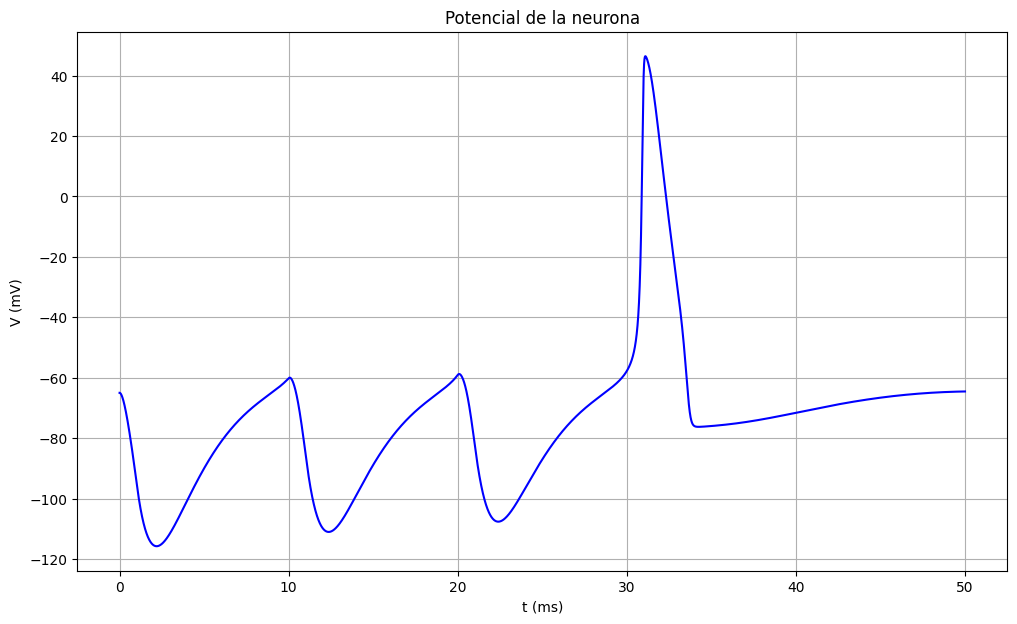

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,50,50000), v, label="Vsync",c="b")
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona')
plt.grid()

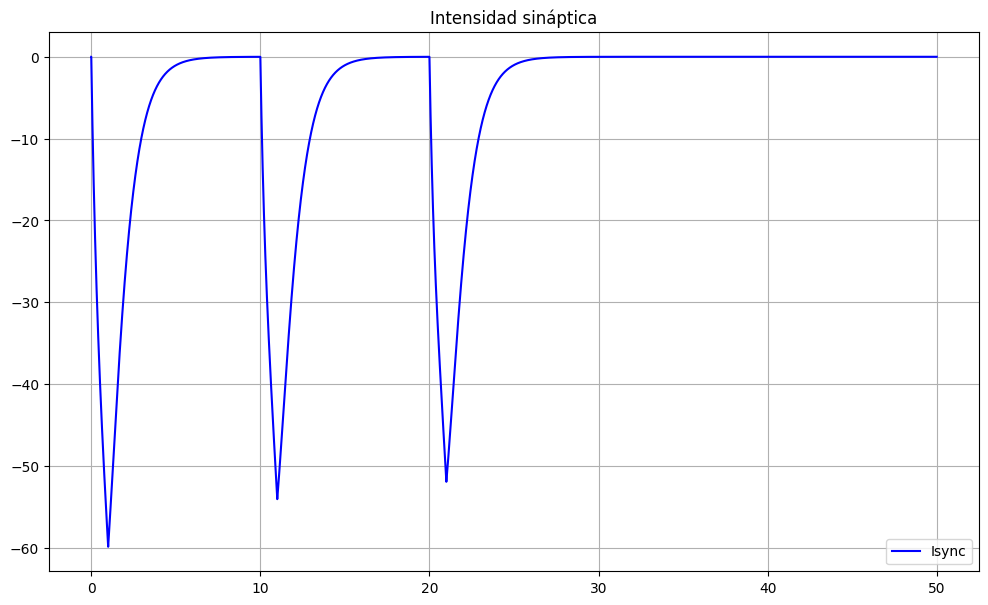

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,50,50000), Isync,label="Isync",c="blue")
ax.set_title('Intensidad sináptica')
ax.legend()
plt.grid()

En el modelo desarrollado, la sinapsis se representa como una conductancia sináptica, que se utiliza para determinar la corriente sináptica que fluye a través de la neurona postsináptica. La corriente sináptica se calcula en la última línea del bucle for, teniendo en cuenta la conductancia sináptica, el valor del potencial de membrana en la iteración anterior y la inversión del potencial de la sinapsis, es decir a la diferencia de potencial que existe entre el potencial de membrana de la neurona presináptica y el potencial de reposo de la neurona postsináptica en una sinapsis. Esta corriente sináptica resultante juega un papel importante en la modulación de la actividad de la neurona postsináptica y en la transmisión de señales entre las neuronas en el circuito.

En el modelo, la conductancia sináptica se representa como un término multiplicativo en la ecuación de corriente sináptica. Esta conductancia está determinada por un factor de relajación y la variable de compuerta de la sinapsis, denotada como "r". La dinámica de la variable de compuerta "r" se describe mediante una ecuación diferencial separada.

En resumen, la conductancia sináptica regula la cantidad de corriente que fluye a través de la sinapsis, dependiendo de la activación de la sinapsis representada por la variable de compuerta "r". A medida que "r" aumenta debido a los potenciales de acción pre-sinápticos, la conductancia sináptica se incrementa. Esto, a su vez, resulta en un aumento de la corriente sináptica que fluye a través de la neurona postsináptica. La corriente sináptica influencia la dinámica del potencial de membrana de la neurona y puede generar nuevos potenciales de acción si supera el umbral de disparo de la neurona produciendo el efecto de plasticidad neuronal, que es la capacidad de las neuronas y las redes neuronales para adaptarse a cambios en el entorno o en la actividad neuronal, ya sea a corto o largo plazo. Esto puede resultar en cambios en la fuerza y la eficacia de las conexiones sinápticas, lo que afecta la transmisión de señales entre neuronas.

En la gráfica del potencial de la neurona, se pueden observar tres incrementos que corresponden a tres pulsos de corriente sináptica (Isyn). Es notable que el tercer incremento es mucho más pronunciado que los dos anteriores, lo cual se relaciona con la generación de un spike. Esto ocurre debido a que la neurona no tiene suficiente tiempo para repolarizarse por completo después de cada pulso antes de que llegue el siguiente. Como resultado, cada nuevo incremento se "suma" sobre un valor ya elevado, y esto se acumula de manera progresiva. Con cada pulso, el potencial de la neurona alcanza valores más altos, hasta que finalmente, con el tercer pulso, el umbral es superado y se produce el spike.

En resumen, la falta de tiempo para la repolarización completa de la neurona entre los pulsos de corriente sináptica permite que los incrementos se sumen gradualmente a un nivel más alto. Este efecto acumulativo conduce a que el potencial de membrana supere un cierto umbral crítico, desencadenando la generación del spike en la neurona.

### Parte 2. Modelo HR

In [ ]:
L=2000000

In [ ]:
x=np.zeros(L)
y=np.zeros(L)
z=np.zeros(L)

x_0=-1.5
y_0=0.3
z_0=3

mu = 0.0021
s = 4

a=3
b=1
c=1
d=5

In [ ]:
def HR(e):
  for i in range(0,L):
    if i==0:
      x[i]=x_0
      y[i]=y_0
      z[i]=z_0
    else:
      x[i] = x[i-1] + (0.01)*(y[i-1] + a*x[i-1]*x[i-1] - b*x[i-1]*x[i-1]*x[i-1] - z[i-1] + e)
      y[i] = y[i-1] + (0.01)*(c - d*x[i-1]*x[i-1] - y[i-1])
      z[i] = z[i-1] + (0.01)*(mu *(s*(x[i-1] +1.6) - z[i-1]))

# **Actividad regular**


In [ ]:
HR(3)

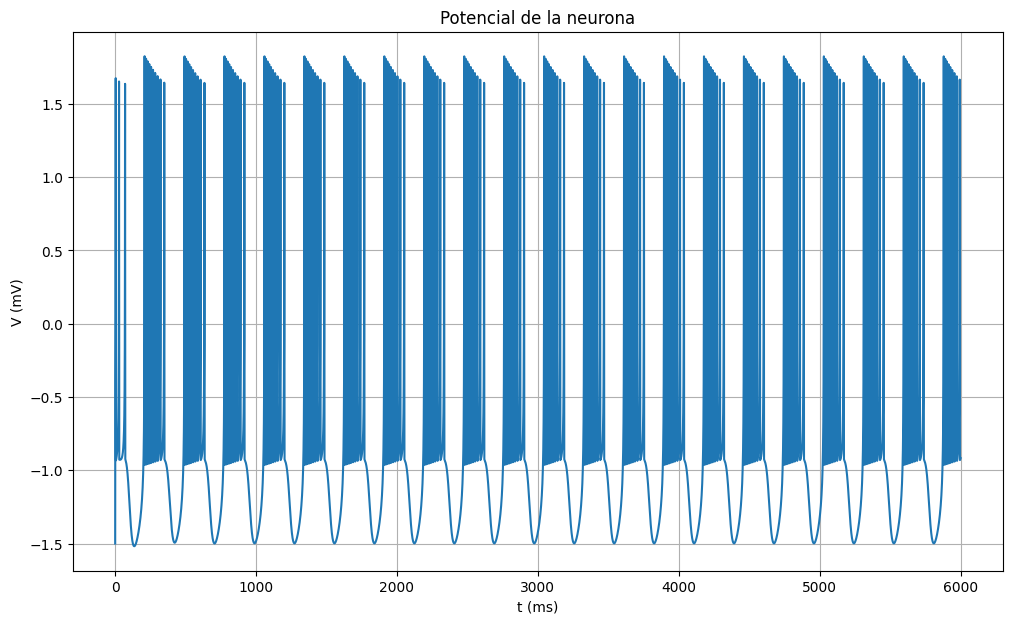

In [ ]:
ig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,6000,L), x)
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona')
plt.grid()

Se observa que la neurona se estabiliza a partir del primer spike y se observa que se produce un patrón que se repite periodicamente.

# **Actividad caótica**

In [ ]:
HR(3.281)

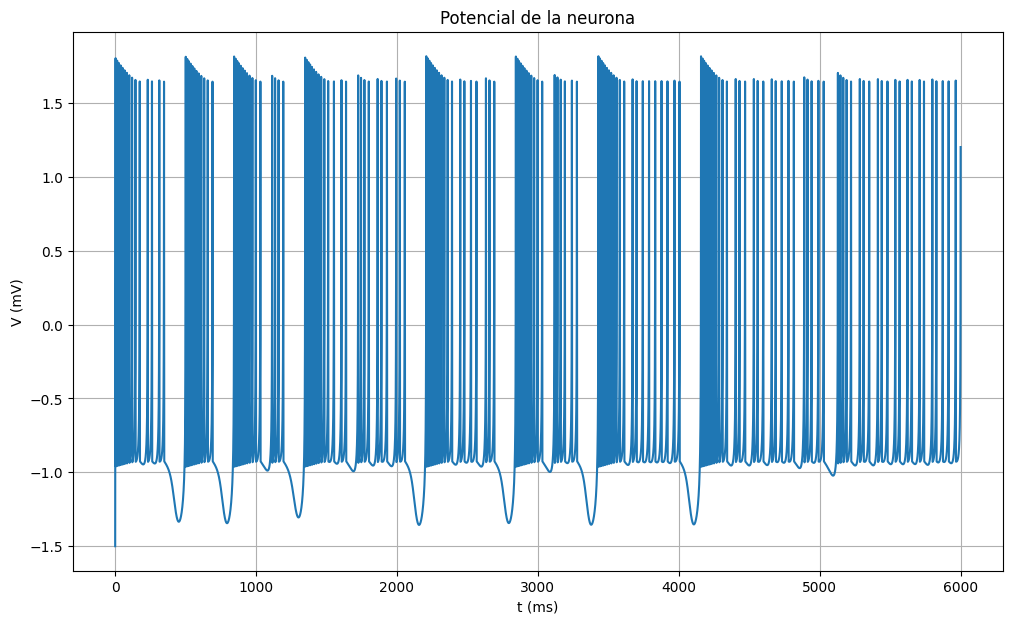

In [ ]:
ig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,6000,L), x)
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona')
plt.grid()

La neurona no se estabiliza y no se generá un patrón regular que se repita continuamente

### Red neuronal CPG (Control Pattern Global)

En esta sección se creara una red neuronal CPG a partir del modelo neuronal de Hindmarsh–Rose realizado en el apartado anterior. Este CPG tratará de uno reducido, que nos ayudará a entender los principios fundamentales sobre la generación de patrones.

Se ha desarrollado un diccionario que contendrá información sobre las neuronas del modelo CPG. Cada neurona estará representada por una clave única, y su valor estará compuesto por tres arrays correspondientes a las variables x, y y z, que son los elementos 0, 1 y 2 respectivamente. Además, en el caso específico de las neuronas LP y PY, se incluirán tres elementos adicionales en el valor del diccionario, que corresponden a las variables m, $k_1\ y\ k_2$.
También se añadirán las conexiones entre neuronas en el diccionario. Luego a parte del diccionario se definen las diferentes constantes necesarias para la implementación del modelo.

In [ ]:
L=8000000

In [ ]:
neuronas={
    "PD1":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "PD2":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "AB":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "LP":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),0.74,0.007)),
    "PY":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),0.74,0.15)),

    "PD2-PD1":0.332, #Dirección inversa con el mismo valor
    "AB-PD1":0.325,  #Dirección inversa con el mismo valor
    "AB-PD2":0.548,  #Dirección inversa con el mismo valor

    "gfAB-LP": 0.112,
    "gfAB-PY":0.120,
    "gfLP-AB":0.585,
    "gfLP-PY":0.241,
    "gfPY-LP":0.186,

    "glAB-LP":0.032,
    "glAB-PY":0.029
}

x=0
y=1
z=2
m=3
k1=4
k2=5

mu = 0.0021
s = 4

a=3
b=1
c=1
d=5

<ipython-input-3-f7025b5f156d>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "LP":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),0.74,0.007)),
<ipython-input-3-f7025b5f156d>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "PY":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),0.74,0.15)),


Constantes para calcular las sinapsis quimicas de las neuronas AB, LP y PY

In [ ]:
e_syn=-1.92
v_fast=-1.66
s_fast=0.44
s_slow=1
v_slow=-1.74

Funciones que calculan:
- $difPot\ =\ \sum_{j\neq i}g_{ij}(x_i(t)-x_j(t))$

- $Ifast_X\ =\ \sum_i \frac{g_{fast\ YX}(V_X-E_{syn}}{1+exp(s_{fast}(V_{fast}-V_Y))}$

- $Islow_X\ =\ \sum_{Y}g_{slow\ YX}m_{slowX}(V_X-E_{syn})$

In [ ]:
def difPoten(g,xi,xj):
  sum=0
  for i in range(0,len(xj)):
    sum+=g[i]*(xi-xj[i])
  return sum

In [ ]:
def Ifast(g,xi,xj):
  sum=0
  for i in range(0,len(xj)):
    sum+=(g[i]*(xi-e_syn))/(1+np.exp(s_fast*(v_fast-xj[i])))
  return sum

In [ ]:
def Islow(g,xi,m_slow):
  sum=0
  sum+=g*m_slow*(xi-e_syn)
  return sum

Implementación del CPG reducido con hindmarsh–rose

In [ ]:
def iteracion(neurona,t,x_vec_e=[0],x_vec_f=[0],g_elec=[0],g_fast=[0],g_slow=[0],fast=0,slow=0,e=3):

  Isyn=0
  if fast==1:
    Isyn+=Ifast(g_fast,neurona[x][t-1],x_vec_f)
  if slow==1:
    Isyn+=Islow(g_slow,neurona[x][t-1],neurona[m][t-1])

  neurona[x][t]=neurona[x][t-1] + (0.001)*(neurona[y][t-1] + a*neurona[x][t-1]*neurona[x][t-1] - b*neurona[x][t-1]*neurona[x][t-1]*neurona[x][t-1] \
                                           - neurona[z][t-1] + e - difPoten(g_elec,neurona[x][t-1],x_vec_e) -  Isyn)

  neurona[y][t] = neurona[y][t-1] + (0.001)*(c - d*neurona[x][t-1]*neurona[x][t-1] - neurona[y][t-1])
  neurona[z][t] = neurona[z][t-1] + (0.001)*(mu *(s*(neurona[x][t-1] +1.6) - neurona[z][t-1]))

  if neurona.shape[0] > 3:
    neurona[m][t] = neurona[m][t-1] + (0.001)*((neurona[k1]*(1-neurona[m][t-1]))/(1+np.exp(s_slow*(v_slow-neuronas["AB"][x][t-1])))-neurona[k2]*neurona[m][t-1])

In [ ]:
def caso_base(neurona,t,x_0,y_0,z_0,m_0=0):
  neurona[x][t]=x_0
  neurona[y][t] = y_0
  neurona[z][t] = z_0

  if neurona.shape[0] > 3:
    neurona[m][t]=m_0

Valores iniciales de las neuronas:
- PD1: $x_0=-1.5,\ y_0=0.3\ y\ z_0=3$
- PD2: $x_0=-1.5,\ y_0=0.3\ y\ z_0=3$
- AB: $x_0=-1.5,\ y_0=0.1,\ z_0=3\ y\ m_0=1$
- PY: $x_0=-0.5,\ y_0=6,\ z_0=5\ y\ m_0=1$
- LP: $x_0=3,\ y_0=-3,\ z_0=3\ y\ m_0=1$

In [ ]:
def global_HR(neuronas):
  for i in range(0,L):
    if i==0:
      caso_base(neuronas["PD1"],i,-1.5,0.3,3)
      caso_base(neuronas["PD2"],i,-1.5,0.3,3)
      caso_base(neuronas["AB"],i,-1.5,0.1,3,1)
      caso_base(neuronas["PY"],i,-0.5,6,5,1)
      caso_base(neuronas["LP"],i,3,-3,3,1)
    else:
      iteracion(neuronas["PD1"],i,x_vec_e=np.array((neuronas["PD2"][x][i-1],neuronas["AB"][x][i-1])),g_elec=np.array((neuronas["PD2-PD1"],neuronas["AB-PD1"])))
      iteracion(neuronas["PD2"],i,x_vec_e=np.array((neuronas["PD1"][x][i-1],neuronas["AB"][x][i-1])),g_elec=np.array((neuronas["PD2-PD1"],neuronas["AB-PD2"])))

      iteracion(neuronas["AB"],i,x_vec_e=np.array((neuronas["PD1"][x][i-1],neuronas["PD2"][x][i-1])),x_vec_f=[neuronas["LP"][x][i-1]],\
                g_elec=np.array((neuronas["AB-PD1"],neuronas["AB-PD2"])),g_fast=[neuronas["gfLP-AB"]],fast=1)

      iteracion(neuronas["LP"],i,x_vec_f=np.array((neuronas["AB"][x][i-1],neuronas["PY"][x][i-1])),\
                g_fast=np.array((neuronas["gfAB-LP"],neuronas["gfPY-LP"])),g_slow=neuronas["glAB-LP"],fast=1,slow=1)

      iteracion(neuronas["PY"],i,x_vec_f=np.array((neuronas["AB"][x][i-1],neuronas["LP"][x][i-1])),\
                g_fast=np.array((neuronas["gfAB-PY"],neuronas["gfLP-PY"])),g_slow=neuronas["glAB-PY"],fast=1,slow=1)

In [ ]:
global_HR(neuronas)

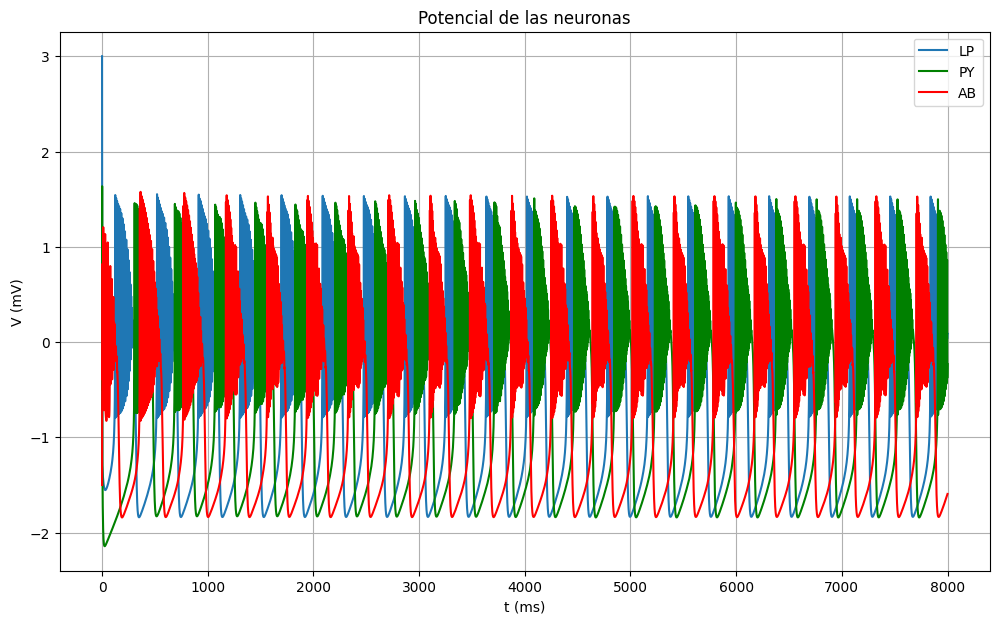

In [ ]:
ig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,8000,L), neuronas["LP"][x],label="LP")
ax.plot(np.linspace(0,8000,L), neuronas["PY"][x],c="g", label="PY")
ax.plot(np.linspace(0,8000,L), neuronas["AB"][x],c="r", label="AB")
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de las neuronas')
plt.legend()
plt.grid()

Como se puede observar en el gráfico, en las tres neuronas que están enlazadas quimicamente con enlaces sinápticos fast y slow (AB, LP y PY), se produce su sincronización de antifases, es decir la alternancia de alcanzar el valor máximo de cada neurona con el que se acaba generando un patrón que se repite periodicamente cuando se transcurre 500 ms.

Se puede observar como esto da lugar al característico patrón de activación secuencial de las neuronas del circuito. Es un patrón robusto, ya que a pesar de que la duración de los distintos disparos puedan variar, el orden de los mismos es siempre el mismo, en particular rojo-azul-verde en este gráfica. El uso de CPGs es útil para el estudio de los comportamientos complejos producidos al realizar actividades rítmicas como podría ser caminar.

Potencial de las neuronas con con conexiones electricas

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


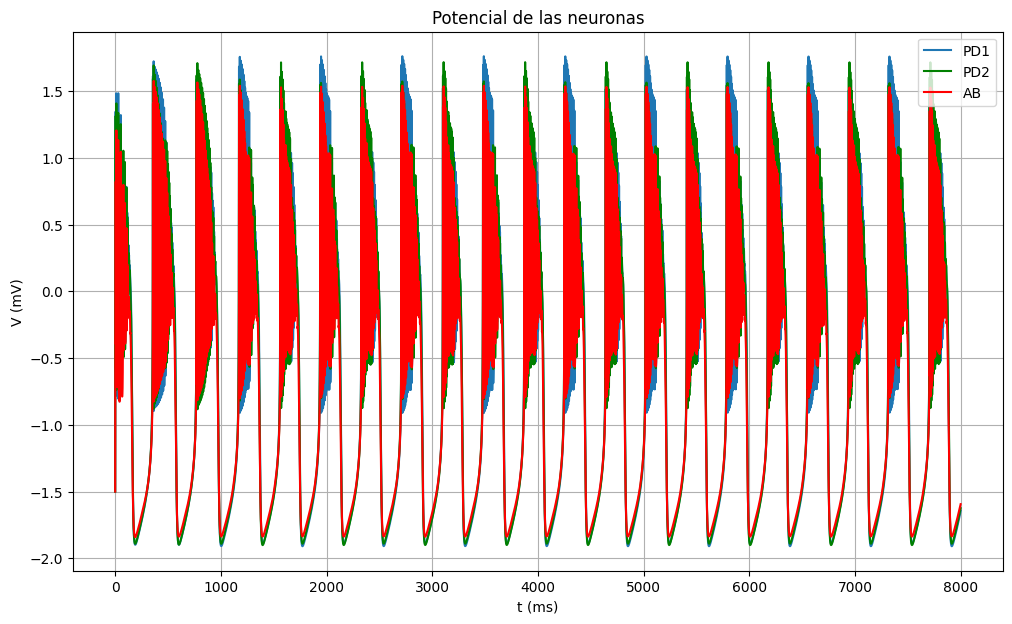

In [ ]:
ig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,8000,L), neuronas["PD1"][x],label="PD1")
ax.plot(np.linspace(0,8000,L), neuronas["PD2"][x],c="g", label="PD2")
ax.plot(np.linspace(0,8000,L), neuronas["AB"][x],c="r", label="AB")
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de las neuronas')
plt.legend()
plt.grid()

En esta última sección, se observa la sincronización completa que se produce con las neuronas enlazadas electricamente (PD1, PD2 y AB)